<a href="https://colab.research.google.com/github/rakesh4real/swift4tensorflow/blob/master/05_01_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [0]:
import Python // Visualisations
import TensorFlow

In [91]:
let plt = Python.import("matplotlib.pyplot")
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


# Prepare Dataset

In [0]:
// create

In [0]:
let num_of_data_points: Int = 100
var X = Tensor<Float>(rangeFrom: 0, to: 100, stride: 1)

let slope: Float = 2.0 
let intercept: Float = 3.0
let error = ( Tensor<Float>(randomNormal: [100]) ) * 0.8

let y: Tensor<Float> = slope * X + intercept + error

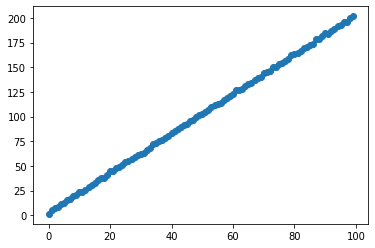

None


In [94]:
plt.close();
plt.plot(X.makeNumpyArray(), y.makeNumpyArray(), marker: "o")
plt.show();

# Split

In [0]:
// Shuffle
var shuffled_indices = Array<Int>(0..<X.scalarCount).shuffled()
var shuffled_X = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced
var shuffled_y = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced

for i in 0..<X.scalarCount{
  shuffled_X[i] = X[shuffled_indices[i]]
  shuffled_y[i] = X[shuffled_indices[i]]
}

// print(shuffled_X.description)

In [0]:
var split_percent: Float = 0.8
var train_count: Int = Int( Float(shuffled_X.scalarCount) * split_percent )

In [0]:
// generate test - train
let train_x = shuffled_X.slice(lowerBounds: [0], upperBounds: [train_count])
let test_x = shuffled_X.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])
let train_y = shuffled_y.slice(lowerBounds: [0], upperBounds: [train_count])
let test_y = shuffled_y.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])

/*
print(train_x.scalarCount)
print(train_y.scalarCount)
print(test_x.scalarCount)
print(test_y.scalarCount)
*/

// add bias to x_train for mx+'c'
// reshape both(ones & train_x) before concatenation
var ones_train = Tensor<Float>(ones: [train_count, 1])
var x_train_with_bias = train_x.reshaped(to: [train_count,1]).concatenated(with: ones_train, alongAxis: 1)

var ones_test = Tensor<Float>(ones: [(num_of_data_points - train_count), 1])
var x_test_with_bias = test_x.reshaped(to: [num_of_data_points - train_count, 1]).concatenated(with: ones_test, alongAxis: 1)

# Loss Function

In [0]:
@differentiable
func cost(predicted: Tensor<Float>, true_measure: Tensor<Float>) -> Tensor<Float>{
  let m: Float = Float( predicted.scalarCount )
  return (1 / (2 * m) ) * pow(predicted - true_measure, 2).sum()
}

In [0]:
var theta = Tensor<Float>(randomNormal: [2, 1])

In [0]:

for _ in 1...1000{
  var pred2 = x_train_with_bias • theta
  var grad = gradient(at: pred2, train_y, in: cost)
  theta[0] = theta[0] - grad.0[0] * 0.01
  theta[1] = theta[1] - grad.1[1] * 0.01
  //print(cost(predicted: pred2, true_measure: train_y))
}


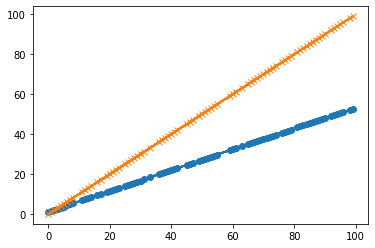

None


In [139]:
plt.close();
plt.plot(train_x.makeNumpyArray(), pred2.reshaped(to: [80]).makeNumpyArray(), marker: "o")
plt.plot(train_x.makeNumpyArray(), train_y.makeNumpyArray(), marker: "x")
plt.show();

In [140]:
pred2

[[ 50.082302],
 [  9.950514],
 [  27.14985],
 [ 15.683626],
 [ 16.726011],
 [ 1.6114426],
 [ 18.289587],
 [ 25.586275],
 [ 46.433956],
 [ 26.628658],
 [ 43.827995],
 [ 49.561108],
 [ 37.573692],
 [  24.54389],
 [ 49.039917],
 [ 40.700844],
 [ 1.0902505],
 [ 51.124683],
 [ 39.658463],
 [ 14.641243],
 [ 45.391575],
 [ 13.077667],
 [  34.96773],
 [ 20.895546],
 [  29.23462],
 [ 28.192234],
 [ 7.3445544],
 [ 3.6962106],
 [ 45.912766],
 [ 19.853163],
 [ 12.035282],
 [ 28.713427],
 [ 4.2174025],
 [ 21.416739],
 [ 2.1326346],
 [ 29.755812],
 [ 15.162436],
 [ 35.488926],
 [ 16.204819],
 [  41.74323],
 [ 50.603493],
 [ 25.065083],
 [ 32.882965],
 [ 36.010117],
 [  33.92535],
 [ 7.8657465],
 [ 22.980314],
 [ 5.2597866],
 [ 3.1750185],
 [   37.0525],
 [ 38.616077],
 [ 17.247202],
 [ 20.374355],
 [11.5140915],
 [  47.99753],
 [ 39.137268],
 [  52.16707],
 [ 31.840578],
 [ 38.094887],
 [  42.26442],
 [  46.95515],
 [ 52.688263],
 [ 43.306805],
 [ 22.459122],
 [  47.47634],
 [ 12.556475],
 [ 2.65382

In [114]:
train_x

[94.0, 17.0, 50.0, 28.0, 30.0,  1.0, 33.0, 47.0, 87.0, 49.0, 82.0, 93.0, 70.0, 45.0, 92.0, 76.0,  0.0, 96.0, 74.0, 26.0,
 85.0, 23.0, 65.0, 38.0, 54.0, 52.0, 12.0,  5.0, 86.0, 36.0, 21.0, 53.0,  6.0, 39.0,  2.0, 55.0, 27.0, 66.0, 29.0, 78.0,
 95.0, 46.0, 61.0, 67.0, 63.0, 13.0, 42.0,  8.0,  4.0, 69.0, 72.0, 31.0, 37.0, 20.0, 90.0, 73.0, 98.0, 59.0, 71.0, 79.0,
 88.0, 99.0, 81.0, 41.0, 89.0, 22.0,  3.0, 40.0, 60.0, 68.0, 51.0, 25.0, 11.0,  7.0, 14.0, 83.0, 16.0, 19.0, 77.0, 84.0]


In [119]:
train_y

[94.0, 17.0, 50.0, 28.0, 30.0,  1.0, 33.0, 47.0, 87.0, 49.0, 82.0, 93.0, 70.0, 45.0, 92.0, 76.0,  0.0, 96.0, 74.0, 26.0,
 85.0, 23.0, 65.0, 38.0, 54.0, 52.0, 12.0,  5.0, 86.0, 36.0, 21.0, 53.0,  6.0, 39.0,  2.0, 55.0, 27.0, 66.0, 29.0, 78.0,
 95.0, 46.0, 61.0, 67.0, 63.0, 13.0, 42.0,  8.0,  4.0, 69.0, 72.0, 31.0, 37.0, 20.0, 90.0, 73.0, 98.0, 59.0, 71.0, 79.0,
 88.0, 99.0, 81.0, 41.0, 89.0, 22.0,  3.0, 40.0, 60.0, 68.0, 51.0, 25.0, 11.0,  7.0, 14.0, 83.0, 16.0, 19.0, 77.0, 84.0]


In [126]:
var pred2 = x_train_with_bias • theta
print(x_train_with_bias.shape)

[80, 2]
